In [10]:
Youtube_API_Key = "Enter_the_API_key"
OpenAI_API_KEY = "Enter_the_API_key"
gorq_API_KEY_1 = "Enter_the_API_key"
gorq_API_KEY_2 ="Enter_the_API_key"
Youtube_Video_ID = "Enter_the_Video_ID"
google_gemini_AI_API_KEY = "Enter_the_API_key"

In [3]:
import time
from groq import APIError
from groq import Groq


import googleapiclient.discovery
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

from transformers import AutoTokenizer, AutoModelForSequenceClassification

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('English')

import torch

[nltk_data] Downloading package punkt to /Users/gautambr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gautambr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pull All Comments

In [5]:
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = Youtube_API_Key
VIDEO_ID = Youtube_Video_ID
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId=VIDEO_ID,
    maxResults=100
)

comments = []

# Execute the request.
response = request.execute()

# Get the comments from the response.
for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        item['snippet']['totalReplyCount'],
        public
    ])

while (1 == 1):
  try:
   nextPageToken = response['nextPageToken']
  except KeyError:
   break
  nextPageToken = response['nextPageToken']
  # Create a new request object with the next page token.
  nextRequest = youtube.commentThreads().list(part="snippet", videoId=Youtube_Video_ID, maxResults=100, pageToken=nextPageToken)
  # Execute the next request.
  response = nextRequest.execute()
  # Get the comments from the next response.
  for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        item['snippet']['totalReplyCount'],
        public
    ])

df = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','totalReplyCount','public'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   author           2265 non-null   object
 1   updated_at       2265 non-null   object
 2   like_count       2265 non-null   int64 
 3   text             2265 non-null   object
 4   totalReplyCount  2265 non-null   int64 
 5   public           2265 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 90.8+ KB


In [5]:
df.shape

(2185, 6)

In [6]:
# Define the video ID.
VIDEO_ID = Youtube_Video_ID
# Request to get video details, including the title.
video_request = youtube.videos().list(
    part="snippet",
    id=VIDEO_ID
)

# Execute the video request.
video_response = video_request.execute()

# Extract the title.
video_title = video_response['items'][0]['snippet']['title']
print("Video Title:", video_title)

Video Title: Is Make In India Failing? | Case study


In [7]:
Folder_Path = f'/Users/gautambr/Documents/Great Learning/Natural language Processing/YoutubeCommentAnalysis/{video_title}'

In [92]:
from youtube_transcript_api import YouTubeTranscriptApi

# Define the video ID
VIDEO_ID = Youtube_Video_ID

# Get the transcript
try:
    transcript = YouTubeTranscriptApi.get_transcript(VIDEO_ID)
    with open(f"{Folder_Path}/transcript.txt", "w") as file:
        for line in transcript:
            file.write(f"{line['start']} - {line['text']}\n")
except Exception as e:
    print("Error:", e)

In [6]:
response['items'][1]

{'kind': 'youtube#commentThread',
 'etag': 'cfeayuF-uYUb3tHCnG3NpNseXP0',
 'id': 'Ugzko1ZP8PKlc0lTXTF4AaABAg',
 'snippet': {'channelId': 'UCKZozRVHRYsYHGEyNKuhhdA',
  'videoId': '0DrAzdRo3RM',
  'topLevelComment': {'kind': 'youtube#comment',
   'etag': '4L1-amrTLIOmFetof6K51A-hSGY',
   'id': 'Ugzko1ZP8PKlc0lTXTF4AaABAg',
   'snippet': {'channelId': 'UCKZozRVHRYsYHGEyNKuhhdA',
    'videoId': '0DrAzdRo3RM',
    'textDisplay': 'I also think that the respect people give to the jobs also matters to the people like if someone says he is a mechanical engineer even though he may earn more the respect that society gives to him compared to a it guy is less <br>That judging of the jobs should also change if we want to improve',
    'textOriginal': 'I also think that the respect people give to the jobs also matters to the people like if someone says he is a mechanical engineer even though he may earn more the respect that society gives to him compared to a it guy is less \nThat judging of the jobs

In [7]:
import pandas as pd
from googleapiclient import discovery

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = Youtube_API_Key
VIDEO_ID = "0DrAzdRo3RM"

youtube = discovery.build(api_service_name, api_version, developerKey=DEVELOPER_KEY)

# Function to get comments
def get_comments(video_id):
    comments = []
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100
    )
    
    comment_id = 1  # Initialize the ID for comments

    while request:
        response = request.execute()
        for item in response.get('items', []):
            comment = item['snippet']['topLevelComment']['snippet']
            public = item['snippet']['isPublic']
            total_reply_count = item['snippet']['totalReplyCount']
            comment_id_str = f"C{comment_id}"  # Format for comment ID
            comments.append([
                comment_id_str,
                comment['authorDisplayName'],
                comment['publishedAt'],
                comment['likeCount'],
                comment['textOriginal'],
                total_reply_count,
                public,
                'comment'  # Type for comments
            ])
            
            # If there are replies, get them
            if total_reply_count > 0:
                replies = get_replies(item['id'], comment_id_str)
                comments.extend(replies)
            
            comment_id += 1  # Increment the ID for the next comment
        
        request = youtube.commentThreads().list_next(request, response)
    
    return comments

# Function to get replies for a specific comment
def get_replies(comment_thread_id, parent_comment_id):
    replies = []
    request = youtube.comments().list(
        part="snippet",
        parentId=comment_thread_id,
        maxResults=100
    )

    reply_count = 1  # Initialize the reply count for this comment

    while request:
        response = request.execute()
        for item in response.get('items', []):
            comment = item['snippet']
            reply_id_str = f"{parent_comment_id}R{reply_count}"  # Format for reply ID
            replies.append([
                reply_id_str,  # Add the reply ID
                comment['authorDisplayName'],
                comment['publishedAt'],
                comment['likeCount'],
                comment['textOriginal'],
                0,  # No replies count for replies
                True,  # Assuming replies are public
                'reply'  # Type for replies
            ])
            reply_count += 1  # Increment the reply count
        
        request = youtube.comments().list_next(request, response)
    
    return replies

# Get all comments
all_comments = get_comments(VIDEO_ID)

# Create a DataFrame
df = pd.DataFrame(all_comments, columns=['id', 'author', 'updated_at', 'like_count', 'text', 'totalReplyCount', 'public', 'type'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3254 non-null   object
 1   author           3254 non-null   object
 2   updated_at       3254 non-null   object
 3   like_count       3254 non-null   int64 
 4   text             3254 non-null   object
 5   totalReplyCount  3254 non-null   int64 
 6   public           3254 non-null   bool  
 7   type             3254 non-null   object
dtypes: bool(1), int64(2), object(5)
memory usage: 181.3+ KB


In [8]:
df.to_excel('/Users/gautambr/Documents/Great Learning/Comments.xlsx', sheet_name='Data', index=False, engine='openpyxl')

In [9]:
request = youtube.comments().list(
        part="snippet",
        parentId="UgzhGXzMBGqo1D3Z9sd4AaABAg",
        maxResults=100
    )
response = request.execute()

In [10]:
for i in range(len(response['items'])):
    print(response['items'][i]['snippet'])
    print("###################################################")

{'channelId': 'UCKZozRVHRYsYHGEyNKuhhdA', 'textDisplay': 'U are Right, This Channel Have Credibility &amp; Accountability lot more than Other cheep channels, These type Tumbnail Doesn&#39;t Suit......📢', 'textOriginal': "U are Right, This Channel Have Credibility & Accountability lot more than Other cheep channels, These type Tumbnail Doesn't Suit......📢", 'parentId': 'UgzhGXzMBGqo1D3Z9sd4AaABAg', 'authorDisplayName': '@Sudeep.M.', 'authorProfileImageUrl': 'https://yt3.ggpht.com/1OKVGHAx0TxaU9hG6SoJwd58jJc0vJ6O2elXovFltigfq3pGxWKQgDTQ00Sg1_nqKUUSaSLnEg=s48-c-k-c0x00ffffff-no-rj', 'authorChannelUrl': 'http://www.youtube.com/@Sudeep.M.', 'authorChannelId': {'value': 'UCaBItPNYck7K3BcO_3GT71w'}, 'canRate': True, 'viewerRating': 'none', 'likeCount': 11, 'publishedAt': '2024-10-28T21:25:52Z', 'updatedAt': '2024-10-28T21:25:52Z'}
###################################################
{'channelId': 'UCKZozRVHRYsYHGEyNKuhhdA', 'textDisplay': 'Bro watching you from the day when u used sit in a sma

## Sort by Likes and Get Top 10

In [11]:
df.head()

,id,author,updated_at,like_count,text,totalReplyCount,public,type
0,C1,@ThinkSchool,2024-10-28T14:15:09Z,75,👉Spam-free Health Insurance - https://ditto.sh...,25,True,comment
1,C1R1,@PikacHu-ey9gp,2024-10-28T15:03:10Z,6,"Infact, that's true, whatever the title suggests",0,True,reply
2,C1R2,@pavang9376,2024-10-28T16:14:00Z,3,Hello sir plz make a video on Delhi air pollut...,0,True,reply
3,C1R3,@SathyaswamyS,2024-10-28T16:27:00Z,0,"Along with Make in India, the entire India is ...",0,True,reply
4,C1R4,@AtulyaPatel-em6ln,2024-10-28T16:55:55Z,1,In my opinion the first problem occurs with ac...,0,True,reply


In [12]:
df.sort_values(by='like_count', ascending=False)[0:10]

,id,author,updated_at,like_count,text,totalReplyCount,public,type
2124,C1879,@Techwolf_official_YT,2024-10-28T18:12:13Z,2006,A few points missing are:\n\n1. Reforms in the...,81,True,comment
2914,C2160,@DuckDuckgo047,2024-10-28T15:29:39Z,1535,Before 10 years india could not make ammunitio...,141,True,comment
2378,C2016,@nishant3899,2024-10-28T16:48:27Z,1345,Men tried.\nMen failed.\nMen learned.\nMen try...,51,True,comment
3139,C2179,@kazuma2060,2024-10-28T14:41:27Z,854,It's not that india will become self reliant w...,15,True,comment
2675,C2106,@himanshuverma3984,2024-10-28T16:04:26Z,604,More than solutions I think India needs to hav...,75,True,comment
2599,C2097,@vidyasagarrvsr3723,2024-10-28T16:11:06Z,600,I am happy to see that instead of blame game ...,38,True,comment
3085,C2173,@AnkitYadav-vz8gk,2024-10-28T15:04:16Z,480,You cannot directly manufactured 100% any prod...,23,True,comment
1031,C965,@XoPlanetI,2024-10-29T17:09:59Z,437,"As an NRI living in the West, I have seen this...",39,True,comment
3121,C2175,@TaxInsightsbyCAShahid,2024-10-28T15:03:38Z,409,It is not the strongest of the species that su...,14,True,comment
3155,C2180,@STRIKER_MATCH_REPORTS,2024-10-28T14:40:59Z,370,BJP Government is necessary for India's growt...,48,True,comment


1) gemma-7b-it
2) llama3-groq-70b-8192-tool-use-preview --- not good
3) llama-3.1-70b-versatile

#### Polarity Score

In [15]:
# Lowercases, Punctuation, Numbers and Newline Characters

def clean_text(text):
    """
    Clean and preprocess text data.

    This function performs several cleaning operations on text data:
    - Lowercases the text (Case Folding)
    - Removes punctuation
    - Removes numbers
    - Removes newline characters

    Parameters:
    text (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.Series: A pandas Series with cleaned text.
    """
    # Lowercasing (Case Folding)
    text = text.str.lower()
    # Removing punctuations, numbers, and newline characters
    text = text.str.replace(r'[^\w\s]', ' ', regex=True)
    text = text.str.replace("\n", ' ', regex=True)
    text = text.str.replace('\d', ' ', regex=True)
    return text

In [16]:
df["Preprocessed_text"] = clean_text(df["text"])

In [17]:
# Stopwords

def remove_stopwords(text):
    """
    Remove stopwords from text data.

    This function filters out common stopwords from the text data. 
    Stopwords are removed based on the NLTK's English stopwords list.

    Parameters:
    text (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.Series: A pandas Series with stopwords removed from the text.
    """
    # Removing stopwords
    text = text.apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))
    return text

In [18]:
df["Preprocessed_text"] = remove_stopwords(df["Preprocessed_text"])

In [19]:
df.head()

,id,author,updated_at,like_count,text,totalReplyCount,public,type,Preprocessed_text
0,C1,@ThinkSchool,2024-10-28T14:15:09Z,75,👉Spam-free Health Insurance - https://ditto.sh...,25,True,comment,spam free health insurance https ditto sh cmdv
1,C1R1,@PikacHu-ey9gp,2024-10-28T15:03:10Z,6,"Infact, that's true, whatever the title suggests",0,True,reply,infact true whatever title suggests
2,C1R2,@pavang9376,2024-10-28T16:14:00Z,3,Hello sir plz make a video on Delhi air pollut...,0,True,reply,hello sir plz make video delhi air pollution s...
3,C1R3,@SathyaswamyS,2024-10-28T16:27:00Z,0,"Along with Make in India, the entire India is ...",0,True,reply,along make india entire india destined stagnat...
4,C1R4,@AtulyaPatel-em6ln,2024-10-28T16:55:55Z,1,In my opinion the first problem occurs with ac...,0,True,reply,opinion first problem occurs accountability go...


In [20]:
polarity = []
for i in df['Preprocessed_text']:
    blob = TextBlob(i)
    polarity.append(round(blob.sentiment.polarity,3))
df['polarity'] = polarity
print('Polarity Column added to the dataframe')

Polarity Column added to the dataframe


In [21]:
print('Reviews with Positive Sentiment based on Polarity :', len(df[df['polarity'] > 0]))
print('Reviews with Negative Sentiment based on Polarity :', len(df[df['polarity'] < 0]))
print('Reviews with Neutral Sentiment based on Polarity :', len(df[df['polarity'] == 0]))

Reviews with Positive Sentiment based on Polarity : 1333
Reviews with Negative Sentiment based on Polarity : 662
Reviews with Neutral Sentiment based on Polarity : 1259


In [22]:
sentiment = []
for i in range(len(df['polarity'])):
    if df['polarity'][i] > 0:
        sentiment.append('Positive')
    elif df['polarity'][i] < 0:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment'] = sentiment
print('Sentiment column has been added to the dataframe.')

Sentiment column has been added to the dataframe.


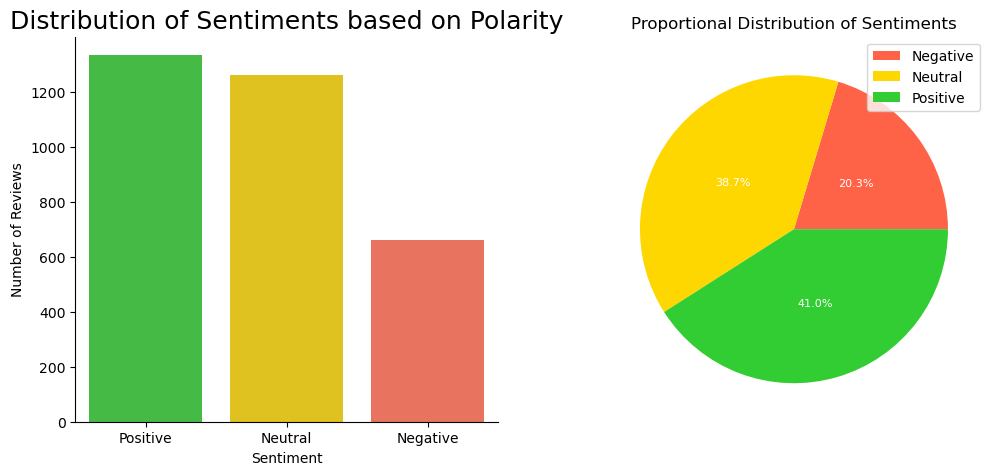

In [97]:
# Define consistent color scheme for Negative, Neutral, and Positive
colors = {'Negative': '#FF6347', 'Neutral': '#FFD700', 'Positive': '#32CD32'}  # Red, Yellow, Green

# Create a figure
plt.figure(figsize=(12, 5))

# Plotting the count of reviews for each sentiment
plt.subplot(1, 2, 1)
sns.countplot(x=df['sentiment'], palette=[colors[label] for label in df['sentiment'].unique()])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments based on Polarity', fontsize=18)

# Plotting the proportional distribution of sentiments
plt.subplot(1, 2, 2)
plt.pie(
    x=[len(df[df['polarity'] < 0]), len(df[df['polarity'] == 0]), len(df[df['polarity'] > 0])],
    labels=['Negative', 'Neutral', 'Positive'],
    colors=[colors['Negative'], colors['Neutral'], colors['Positive']],  # Apply consistent colors
    autopct='%1.1f%%',
    pctdistance=0.5,
    textprops={'fontsize': 8, 'color': 'white'}
)
plt.title('Proportional Distribution of Sentiments')
plt.legend()
plt.show()

#### Sentiment analysis Using BERT

In [24]:
#Downloading the model and the tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [25]:
def split_text_into_chunks(text, max_length=512):
    # Tokenize the text into words
    words = text.split()
    chunks = []
    
    # Create chunks by iterating over the words
    chunk = []
    for word in words:
        chunk.append(word)
        if len(tokenizer.encode(' '.join(chunk))) > max_length:
            chunks.append(' '.join(chunk[:-1]))  # Add the chunk without the last word
            chunk = [word]  # Start a new chunk
    
    # Add the last chunk
    if chunk:
        chunks.append(' '.join(chunk))
    
    return chunks

def sentiment_score(review):
    chunks = split_text_into_chunks(review)
    predictions = []
    
    # Process each chunk
    for chunk in chunks:
        tokens = tokenizer.encode(chunk, return_tensors='pt', truncation=True, padding=True, max_length=512)
        result = model(tokens)
        predictions.append(torch.argmax(result.logits).item())
    
    # Aggregate predictions (e.g., taking the average of the predictions)
    return sum(predictions) / len(predictions)


In [26]:
df['BERT_Score'] = df['text'].apply(lambda x:sentiment_score(x))

Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors


In [29]:
df.head()

,id,author,updated_at,like_count,text,totalReplyCount,public,type,Preprocessed_text,polarity,sentiment,BERT_Score
0,C1,@ThinkSchool,2024-10-28T14:15:09Z,75,👉Spam-free Health Insurance - https://ditto.sh...,25,True,comment,spam free health insurance https ditto sh cmdv,0.400,Positive,4.0
1,C1R1,@PikacHu-ey9gp,2024-10-28T15:03:10Z,6,"Infact, that's true, whatever the title suggests",0,True,reply,infact true whatever title suggests,0.350,Positive,0.0
2,C1R2,@pavang9376,2024-10-28T16:14:00Z,3,Hello sir plz make a video on Delhi air pollut...,0,True,reply,hello sir plz make video delhi air pollution s...,0.000,Neutral,4.0
3,C1R3,@SathyaswamyS,2024-10-28T16:27:00Z,0,"Along with Make in India, the entire India is ...",0,True,reply,along make india entire india destined stagnat...,-0.250,Negative,0.0
4,C1R4,@AtulyaPatel-em6ln,2024-10-28T16:55:55Z,1,In my opinion the first problem occurs with ac...,0,True,reply,opinion first problem occurs accountability go...,0.119,Positive,2.0


In [32]:
sentiment = []
for i in range(len(df['BERT_Score'])):
    if df['BERT_Score'][i] > 2:
        sentiment.append('Positive')
    elif df['BERT_Score'][i] < 2:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['BERT_sentiment'] = sentiment
print('Sentiment column has been added to the dataframe.')

Sentiment column has been added to the dataframe.


In [33]:
df.head()

,id,author,updated_at,like_count,text,totalReplyCount,public,type,Preprocessed_text,polarity,sentiment,BERT_Score,BERT_sentiment
0,C1,@ThinkSchool,2024-10-28T14:15:09Z,75,👉Spam-free Health Insurance - https://ditto.sh...,25,True,comment,spam free health insurance https ditto sh cmdv,0.400,Positive,4.0,Positive
1,C1R1,@PikacHu-ey9gp,2024-10-28T15:03:10Z,6,"Infact, that's true, whatever the title suggests",0,True,reply,infact true whatever title suggests,0.350,Positive,0.0,Negative
2,C1R2,@pavang9376,2024-10-28T16:14:00Z,3,Hello sir plz make a video on Delhi air pollut...,0,True,reply,hello sir plz make video delhi air pollution s...,0.000,Neutral,4.0,Positive
3,C1R3,@SathyaswamyS,2024-10-28T16:27:00Z,0,"Along with Make in India, the entire India is ...",0,True,reply,along make india entire india destined stagnat...,-0.250,Negative,0.0,Negative
4,C1R4,@AtulyaPatel-em6ln,2024-10-28T16:55:55Z,1,In my opinion the first problem occurs with ac...,0,True,reply,opinion first problem occurs accountability go...,0.119,Positive,2.0,Neutral


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


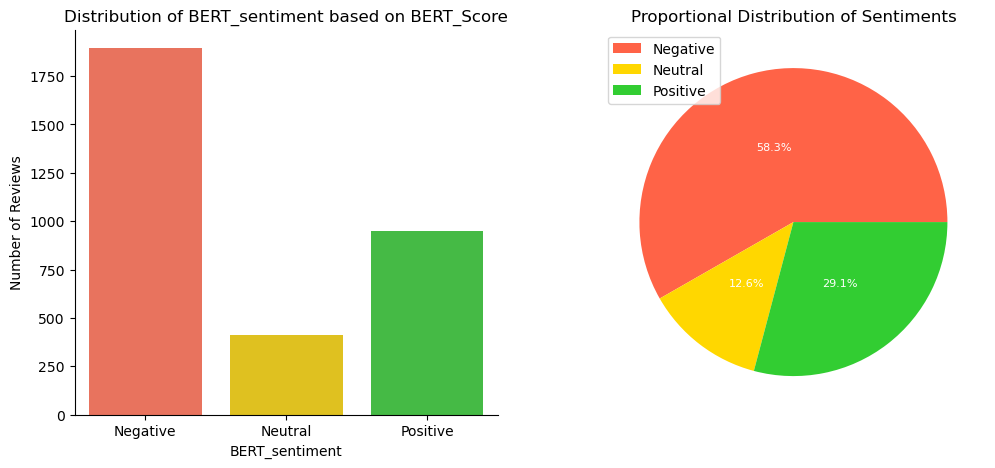

In [102]:
# Sample color scheme for Negative, Neutral, and Positive
colors = ['#FF6347', '#FFD700', '#32CD32']  # Red for Negative, Yellow for Neutral, Green for Positive

# Ensure 'BERT_sentiment' is a categorical type with an explicit order
df['BERT_sentiment'] = pd.Categorical(df['BERT_sentiment'], categories=['Negative', 'Neutral', 'Positive'], ordered=True)

# Create a figure
plt.figure(figsize=(12, 5))

# Plotting the count of reviews for each BERT sentiment
plt.subplot(1, 2, 1)
sns.countplot(x=df['BERT_sentiment'], palette=colors)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('BERT_sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of BERT_sentiment based on BERT_Score', fontsize=12)

# Plotting the proportional distribution of sentiments in a pie chart
plt.subplot(1, 2, 2)
plt.pie(
    x=[len(df[df['BERT_Score'] < 2]), len(df[df['BERT_Score'] == 2]), len(df[df['BERT_Score'] > 2])],
    labels=['Negative', 'Neutral', 'Positive'],
    colors=colors,  # Consistent color scheme
    autopct='%1.1f%%',
    pctdistance=0.5,
    textprops={'fontsize': 8, 'color': 'white'}
)
plt.title('Proportional Distribution of Sentiments')
plt.legend()
plt.show()

In [50]:
def select_category(text, max_retries=3):
    retries = 0
    category = ""
    
    # Create a Groq client instance
    client = Groq(api_key=gorq_API_KEY_2)
    
    while retries < max_retries:
        try:
            # Make the API request
            completion = client.chat.completions.create(
                model="gemma-7b-it",
                messages=[
                    {
                        "role": "system",
                        "content": f"Given the following YouTube comment '{text}', classify it into one of the following categories: Opinion, Suggestion, Appreciation, Criticism, Question, Engagement, Humor, Storytelling, Fact/Information, Reaction, Praise, Constructive Criticism, Poll/Survey, Support, Disagreement. Provide only one category as the output."
                    },
                    {
                        "role": "user",
                        "content": ""
                    }
                ],
                temperature=1,
                max_tokens=1024,
                top_p=1,
                stream=True,
                stop=None,
            )
            
            # Process the streaming response
            for chunk in completion:
                category += chunk.choices[0].delta.content or ""

            category = category.strip()
            print(text, " ----- ", category)
            return category  # Return the category once successfully retrieved
        
        except APIError as e:
            retries += 1
            print(f"API error occurred (attempt {retries}/{max_retries}): {e}")
            if retries < max_retries:
                time.sleep(2 ** retries)  # Exponential backoff (e.g., 2, 4, 8 seconds)
            else:
                print("Max retries reached. Returning default 'Error' category.")
                return "Error"  # Return a fallback value after max retries
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
            return "Error"  # Return a fallback value in case of other errors


In [51]:
df['category'] = df['text'].apply(lambda x: select_category(x))

👉Spam-free Health Insurance - https://ditto.sh/d4cmdv  -----  Fact/Information
Infact, that's true, whatever the title suggests  -----  Opinion
Hello sir plz make a video on Delhi air pollution solutions and why does it become like this everytime  -----  **Criticism**

The comment expresses dissatisfaction with the recurring air pollution issues in Delhi and suggests the creator make a video addressing possible solutions.
Along with Make in India, the entire India is destined to stagnate and fail.  -----  **Criticism**

The comment expresses a negative assessment of the Indian government's Make in India initiative, suggesting that it will lead to stagnation and failure.
In my opinion the first problem occurs with accountability of govt to people . If there are land disputes and environmental clearance problem then govt must provide faster compensation and find a way for environmental clearance so that it don't harm our earth as well as  grow Indian economy.

Second issue is the kind of

In [53]:
df.head()

,id,author,updated_at,like_count,text,totalReplyCount,public,type,Preprocessed_text,polarity,sentiment,BERT_Score,BERT_sentiment,category
0,C1,@ThinkSchool,2024-10-28T14:15:09Z,75,👉Spam-free Health Insurance - https://ditto.sh...,25,True,comment,spam free health insurance https ditto sh cmdv,0.400,Positive,4.0,Positive,Fact/Information
1,C1R1,@PikacHu-ey9gp,2024-10-28T15:03:10Z,6,"Infact, that's true, whatever the title suggests",0,True,reply,infact true whatever title suggests,0.350,Positive,0.0,Negative,Opinion
2,C1R2,@pavang9376,2024-10-28T16:14:00Z,3,Hello sir plz make a video on Delhi air pollut...,0,True,reply,hello sir plz make video delhi air pollution s...,0.000,Neutral,4.0,Positive,**Criticism**\n\nThe comment expresses dissati...
3,C1R3,@SathyaswamyS,2024-10-28T16:27:00Z,0,"Along with Make in India, the entire India is ...",0,True,reply,along make india entire india destined stagnat...,-0.250,Negative,0.0,Negative,**Criticism**\n\nThe comment expresses a negat...
4,C1R4,@AtulyaPatel-em6ln,2024-10-28T16:55:55Z,1,In my opinion the first problem occurs with ac...,0,True,reply,opinion first problem occurs accountability go...,0.119,Positive,2.0,Neutral,Criticism


In [55]:
df.head()

,id,author,updated_at,like_count,text,totalReplyCount,public,type,Preprocessed_text,polarity,sentiment,BERT_Score,BERT_sentiment,category
0,C1,@ThinkSchool,2024-10-28T14:15:09Z,75,👉Spam-free Health Insurance - https://ditto.sh...,25,True,comment,spam free health insurance https ditto sh cmdv,0.400,Positive,4.0,Positive,Fact/Information
1,C1R1,@PikacHu-ey9gp,2024-10-28T15:03:10Z,6,"Infact, that's true, whatever the title suggests",0,True,reply,infact true whatever title suggests,0.350,Positive,0.0,Negative,Opinion
2,C1R2,@pavang9376,2024-10-28T16:14:00Z,3,Hello sir plz make a video on Delhi air pollut...,0,True,reply,hello sir plz make video delhi air pollution s...,0.000,Neutral,4.0,Positive,**Criticism**\n\nThe comment expresses dissati...
3,C1R3,@SathyaswamyS,2024-10-28T16:27:00Z,0,"Along with Make in India, the entire India is ...",0,True,reply,along make india entire india destined stagnat...,-0.250,Negative,0.0,Negative,**Criticism**\n\nThe comment expresses a negat...
4,C1R4,@AtulyaPatel-em6ln,2024-10-28T16:55:55Z,1,In my opinion the first problem occurs with ac...,0,True,reply,opinion first problem occurs accountability go...,0.119,Positive,2.0,Neutral,Criticism


In [56]:
def get_category(cat):
    category_list = categories = [
    "Opinion", "Suggestion", "Appreciation", "Criticism", "Question", 
    "Engagement", "Humor", "Storytelling", "Fact/Information", "Reaction", 
    "Praise", "Constructive Criticism", "Poll/Survey", "Support", "Disagreement"]

    for i in category_list:
        if i in cat:
            return i
            break

In [66]:
df['category'] = df['category'].apply(get_category)

In [67]:
df.head()

,id,author,updated_at,like_count,text,totalReplyCount,public,type,Preprocessed_text,polarity,sentiment,BERT_Score,BERT_sentiment,category
0,C1,@ThinkSchool,2024-10-28T14:15:09Z,75,👉Spam-free Health Insurance - https://ditto.sh...,25,True,comment,spam free health insurance https ditto sh cmdv,0.400,Positive,4.0,Positive,Fact/Information
1,C1R1,@PikacHu-ey9gp,2024-10-28T15:03:10Z,6,"Infact, that's true, whatever the title suggests",0,True,reply,infact true whatever title suggests,0.350,Positive,0.0,Negative,Opinion
2,C1R2,@pavang9376,2024-10-28T16:14:00Z,3,Hello sir plz make a video on Delhi air pollut...,0,True,reply,hello sir plz make video delhi air pollution s...,0.000,Neutral,4.0,Positive,Criticism
3,C1R3,@SathyaswamyS,2024-10-28T16:27:00Z,0,"Along with Make in India, the entire India is ...",0,True,reply,along make india entire india destined stagnat...,-0.250,Negative,0.0,Negative,Criticism
4,C1R4,@AtulyaPatel-em6ln,2024-10-28T16:55:55Z,1,In my opinion the first problem occurs with ac...,0,True,reply,opinion first problem occurs accountability go...,0.119,Positive,2.0,Neutral,Criticism


In [88]:
df.to_excel(f'{Folder_Path}/YT_Comments_Data.xlsx', sheet_name='Data', index=False, engine='openpyxl')

In [8]:
df = pd.read_excel(f'{Folder_Path}/YT_Comments_Data.xlsx',sheet_name='Data')

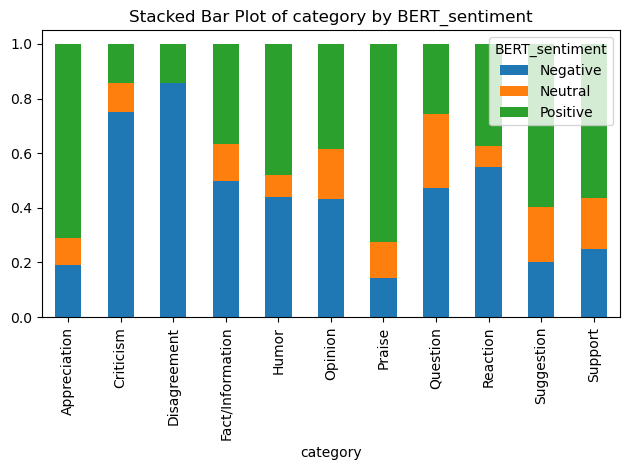

In [77]:
# Assuming you have a DataFrame `df`
df_object = df[['category', 'BERT_sentiment']]

# Create the crosstab of 'category' vs 'BERT_sentiment', normalized by index
crosstab_data = pd.crosstab(df['category'], df['BERT_sentiment'], normalize='index')

# Plot the crosstab data as a stacked bar plot
crosstab_data.plot(kind='bar', stacked=True)

# Set the title of the plot (correct usage of plt.title())
plt.title('Stacked Bar Plot of category by BERT_sentiment')  # Set the title

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

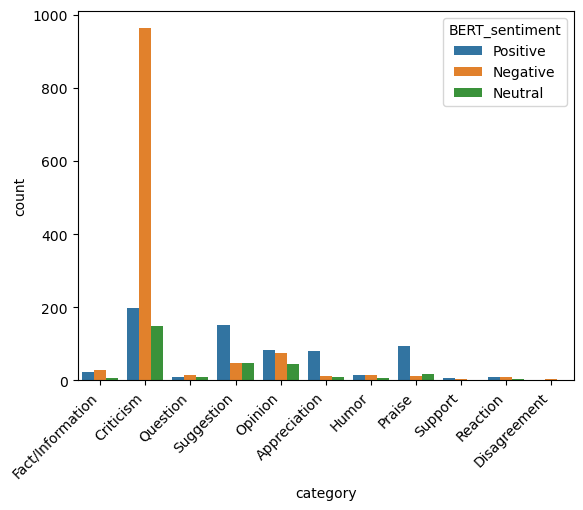

<Figure size 1200x800 with 0 Axes>

In [74]:
# Create the countplot
sns.countplot(data = df[df['type'] == 'comment'],x='category',hue = 'BERT_sentiment', orient="v")

# Rotate the x-axis labels if needed (e.g., by 45 degrees)
plt.xticks(rotation=45, ha='right')  # `ha` is for horizontal alignment (optional)

# Increase the size of the plot
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Adjust layout to make sure labels fit well
plt.tight_layout()

# Show the plot
plt.show()

In [85]:
# Filter comments where totalReplyCount > 1
comments_with_replies = df[df['totalReplyCount'] > 1]

# Initialize an empty list to store the text content
output_lines = []

# For each comment that has replies, add the comment and its replies
for comment_id in comments_with_replies['id']:
    comment = df[df['id'] == comment_id]['text'].iloc[0]
    output_lines.append(f"Comment ID: {comment_id}\n{comment}\n\nReplies:")

    # Get all replies for this comment
    replies = df[df['id'].str.startswith(comment_id + 'R')]  # assuming replies start with the comment ID followed by "R"
    for _, reply in replies.iterrows():
        reply_text = reply['text']
        output_lines.append(f"- {reply_text}")
    
    output_lines.append("\n" + "-"*50 + "\n")

# Write to a text file
with open(f'{Folder_Path}/Conversations.txt', 'w') as file:
    file.write("\n".join(output_lines))

print("Comments and replies have been exported to 'comments_and_replies.txt'")

Comments and replies have been exported to 'comments_and_replies.txt'


In [86]:
# Filter comments where totalReplyCount > 1
comments_with_replies = df[df['totalReplyCount'] > 1]

# Define a function to categorize and write comments based on sentiment
def save_comments_by_sentiment(df):
    # Initialize a dictionary to store file handles for different sentiments
    sentiment_files = {
        'Positive': open(f'{Folder_Path}/positive_comments_conversation.txt', 'w'),
        'Negative': open(f'{Folder_Path}/negative_comments_conversation.txt', 'w'),
        'Neutral': open(f'{Folder_Path}/neutral_comments_conversation.txt', 'w'),
        'Other': open(f'{Folder_Path}/other_comments_conversation.txt', 'w')  # For any comments that don't match positive/negative/neutral
    }

    # Iterate through each comment that has replies
    for comment_id in comments_with_replies['id']:
        comment = df[df['id'] == comment_id]
        comment_text = comment['text'].iloc[0]
        comment_sentiment = comment['sentiment'].iloc[0]

        # Write the comment's text to the appropriate file based on sentiment
        if comment_sentiment == 'Positive':
            sentiment_files['Positive'].write(f"Comment ID: {comment_id}\n{comment_text}\n\nReplies:\n")
        elif comment_sentiment == 'Negative':
            sentiment_files['Negative'].write(f"Comment ID: {comment_id}\n{comment_text}\n\nReplies:\n")
        elif comment_sentiment == 'Neutral':
            sentiment_files['Neutral'].write(f"Comment ID: {comment_id}\n{comment_text}\n\nReplies:\n")
        else:
            sentiment_files['Other'].write(f"Comment ID: {comment_id}\n{comment_text}\n\nReplies:\n")

        # Get all replies for this comment
        replies = df[df['id'].str.startswith(comment_id + 'R')]  # assuming replies start with the comment ID followed by "R"
        for _, reply in replies.iterrows():
            reply_text = reply['text']
            sentiment_files[comment_sentiment].write(f"- {reply_text}\n")

        # Add separator for clarity
        sentiment_files[comment_sentiment].write("\n" + "-"*50 + "\n")

    # Close all file handles after writing
    for file in sentiment_files.values():
        file.close()

# Call the function to process the comments and save them by sentiment
save_comments_by_sentiment(df)

print("Comments have been categorized by sentiment and saved in separate files.")


Comments have been categorized by sentiment and saved in separate files.


In [89]:
import pandas as pd

# Assuming you have a DataFrame `df` (the same as before)

# Filter comments by sentiment
positive_comments = df[df['sentiment'] == 'Positive']
negative_comments = df[df['sentiment'] == 'Negative']
neutral_comments = df[df['sentiment'] == 'Neutral']

# Function to group comments by category and save to a file
def save_comments_by_sentiment(comments, file_name):
    # Initialize a dictionary to store the comments by category
    category_data = {}

    # Iterate through each comment to group by category
    for comment_id in comments['id']:
        comment = df[df['id'] == comment_id]
        comment_text = comment['text'].iloc[0]
        comment_category = comment['category'].iloc[0]  # Get the category of the comment

        # If the category is not already in the dictionary, create an entry for it
        if comment_category not in category_data:
            category_data[comment_category] = []

        # Add the comment text to the category's list
        category_data[comment_category].append(f"Comment ID: {comment_id}\n{comment_text}\n\nReplies:")

        # Get all replies for this comment
        replies = df[df['id'].str.startswith(comment_id + 'R')]  # assuming replies start with the comment ID followed by "R"
        for _, reply in replies.iterrows():
            reply_text = reply['text']
            category_data[comment_category].append(f"- {reply_text}")

        category_data[comment_category].append("\n" + "-"*50 + "\n")

    # Write to a file
    with open(file_name, 'w') as file:
        # For each category, write the category name and its corresponding comments and replies
        for category, comments in category_data.items():
            file.write(f"Category: {category}\n")
            file.write("\n".join(comments))
            file.write("\n\n" + "="*100 + "\n\n")

# Save positive comments to 'positive_comments.txt'
save_comments_by_sentiment(positive_comments, f'{Folder_Path}/positive_comments_by_category.txt')

# Save negative comments to 'negative_comments.txt'
save_comments_by_sentiment(negative_comments, f'{Folder_Path}/negative_comments_by_category.txt')

# Save neutral comments to 'neutral_comments.txt'
save_comments_by_sentiment(neutral_comments, f'{Folder_Path}/neutral_comments_by_category.txt')

print("Comments have been categorized and saved in separate files")

Comments have been categorized and saved in separate files


In [9]:
df.head()

,id,author,updated_at,like_count,text,totalReplyCount,public,type,Preprocessed_text,polarity,sentiment,BERT_Score,BERT_sentiment,category
0,C1,@ThinkSchool,2024-10-28T14:15:09Z,75,👉Spam-free Health Insurance - https://ditto.sh...,25,True,comment,spam free health insurance https ditto sh cmdv,0.400,Positive,4.0,Positive,Fact/Information
1,C1R1,@PikacHu-ey9gp,2024-10-28T15:03:10Z,6,"Infact, that's true, whatever the title suggests",0,True,reply,infact true whatever title suggests,0.350,Positive,0.0,Negative,Opinion
2,C1R2,@pavang9376,2024-10-28T16:14:00Z,3,Hello sir plz make a video on Delhi air pollut...,0,True,reply,hello sir plz make video delhi air pollution s...,0.000,Neutral,4.0,Positive,Criticism
3,C1R3,@SathyaswamyS,2024-10-28T16:27:00Z,0,"Along with Make in India, the entire India is ...",0,True,reply,along make india entire india destined stagnat...,-0.250,Negative,0.0,Negative,Criticism
4,C1R4,@AtulyaPatel-em6ln,2024-10-28T16:55:55Z,1,In my opinion the first problem occurs with ac...,0,True,reply,opinion first problem occurs accountability go...,0.119,Positive,2.0,Neutral,Criticism


In [ ]:
google_gemini_AI_API_KEY

In [12]:
pip install -r '/Users/gautambr/Documents/Great Learning/Natural language Processing/YoutubeCommentAnalysis/Google Gemini Crash Course Requirements.txt'

INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [13]:
import streamlit as st
import os
from langchain_groq import ChatGroq
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_retrieval_chain
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from dotenv import load_dotenv

gemma-7b-it

In [24]:
load_dotenv()

## load the GROQ And OpenAI API KEY 
groq_api_key=gorq_API_KEY_2
os.environ["GOOGLE_API_KEY"]=google_gemini_AI_API_KEY

st.title("Gemma Model Document Q&A")

llm=ChatGroq(groq_api_key=groq_api_key,
             model_name="Llama3-8b-8192")

prompt=ChatPromptTemplate.from_template(
"""
Answer the questions based on the provided context only.
Please provide the most accurate response based on the question
<context>
{context}
<context>
Questions:{input}

"""
)

def vector_embedding():

    if "vectors" not in st.session_state:

        st.session_state.embeddings=GoogleGenerativeAIEmbeddings(model = "models/embedding-001")
        st.session_state.loader=PyPDFDirectoryLoader(f"{Folder_Path}") ## Data Ingestion
        st.session_state.docs=st.session_state.loader.load() ## Document Loading
        st.session_state.text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200) ## Chunk Creation
        st.session_state.final_documents=st.session_state.text_splitter.split_documents(st.session_state.docs[:20]) #splitting
        st.session_state.vectors=FAISS.from_documents(st.session_state.final_documents,st.session_state.embeddings) #vector OpenAI embeddings





prompt1=st.text_input("Enter Your Question From Doduments")


if st.button("Documents Embedding"):
    vector_embedding()
    st.write("Vector Store DB Is Ready")

import time



if prompt1:
    document_chain=create_stuff_documents_chain(llm,prompt)
    retriever=st.session_state.vectors.as_retriever()
    retrieval_chain=create_retrieval_chain(retriever,document_chain)
    start=time.process_time()
    response=retrieval_chain.invoke({'input':prompt1})
    print("Response time :",time.process_time()-start)
    st.write(response['answer'])

    # With a streamlit expander
    with st.expander("Document Similarity Search"):
        # Find the relevant chunks
        for i, doc in enumerate(response["context"]):
            st.write(doc.page_content)
            st.write("--------------------------------")


In [25]:
import subprocess
subprocess.run(["streamlit", "run", "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py"])


      👋 Welcome to Streamlit!

      If you’d like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email:  

2024-11-17 07:42:19.488 


CompletedProcess(args=['streamlit', 'run', '/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py'], returncode=255)